<a href="https://colab.research.google.com/github/pv21287/CE888/blob/master/Leb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
df.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
data_mean =  np.mean(x)
  final_array= [0]*n_bootstraps
  i= 0
  while i < n_bootstraps:
    random_choice= np.random.choice(x,sample_size)
    final_array[i]=np.mean(random_choice)
    i+=1

  #calculate 95% CI (100- alpha)
  alpha=5
  #calculate lower percentile (2.5)
  lower_p=alpha/2.0
  #retrive observation at lower percentile
  lower= np.percentile(final_array,lower_p)

  #calculate upper percentile (97.5)
  upper_p=(100-alpha)+lower_p
  #retrive observation at upper percentile
  upper= np.percentile(final_array,upper_p)
	return data_mean, lower, upper


In [ ]:
# Call your bootstrap function and plot the results
boots = []
for i in range(50, 3000, 500):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 3000)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):

  data_mean= np.mean(sample)
  final_array= [0]*n_bootstraps
  i= 0
  while i < n_bootstraps:
    random_choice= np.random.choice(sample,sample_size)
    final_array[i]=np.mean(random_choice)
    i+=1

  alpha=20
  lower_p=alpha/2.0
  lower= np.percentile(final_array,lower_p)
  upper_p=(100-alpha)+lower_p
  upper= np.percentile(final_array,upper_p)
	

  return data_mean, lower, upper

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

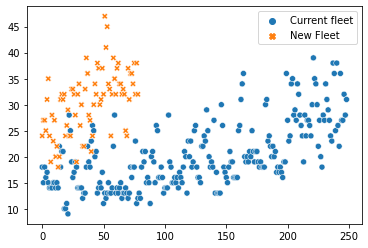

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
#data = df.values
df.head()
#sns.relplot(data = df)
#sns.lineplot(data=df)
#df.tail()
#sns.scatterplot(data= df.iloc[:,0])
sns.scatterplot(data=df)# <---INSERT YOUR CODE HERE--->


In [ ]:
current_fleet = df.values.T[0]
new_fleet= df.values.T[1]


clean_newFleet = np.array([fleet for fleet in new_fleet if str(fleet) != 'nan'])

mean_current = np.mean(current_fleet)
mean_new = np.mean(clean_newFleet)

print("**Permutation test**")

t_obs = mean_new - mean_current    #difference of means
print("Difference in mean: {}".format(t_obs))
len_1 = current_fleet.size 

tmp_currentFleet = current_fleet
tmp_newFleet = clean_newFleet

count_true = 0
for i in range(0,30000):
  tmp_data = np.hstack([tmp_currentFleet, tmp_newFleet]) 
  np.random.shuffle(tmp_data) #does not return anything. Shape 328,
  
  tmp_currentFleet = np.array(tmp_data[:len_1])  
  tmp_newFleet = np.array(tmp_data[len_1:])

  t_perm = np.mean(tmp_newFleet) - np.mean(tmp_currentFleet) #difference of mean after shuffling
  
  if t_perm > t_obs:
     count_true =count_true + 1

p_value = count_true/20000
print("p-value is: {}".format(p_value))

**Permutation test**
Difference in mean: 1.7142857142857135
p-value is: 0.27525


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):

def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    
    t_obs = np.mean(sample1) - np.mean(sample2)
    len_1 = sample1.size
    len_2 = sample2.size
    tmp_sample1 = sample1
    tmp_sample2 = sample2
    n_count = 0
    for i in range(0,n_permutations):
      combined_data = np.hstack([tmp_sample1,tmp_sample2])
      np.random.shuffle(combined_data) #does not return anything.
      tmp_sample1 = np.array(combined_data[:len_1])
      tmp_sample2 = np.array(combined_data[len_1:])
      t_perm = np.mean(tmp_sample2) - np.mean(tmp_sample1)
      if t_perm > t_obs:
        n_count= n_count + 1
      pvalue = n_count/n_permutations


    return pvalue